In [ ]:
pip install

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [2]:
train_df = pd.read_csv('train_flood.csv')
test_df = pd.read_csv('test_flood.csv')

In [13]:
train_df.tail()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495
1117956,1117956,4,5,6,9,5,5,2,8,4,...,4,8,6,5,5,6,7,7,8,0.560


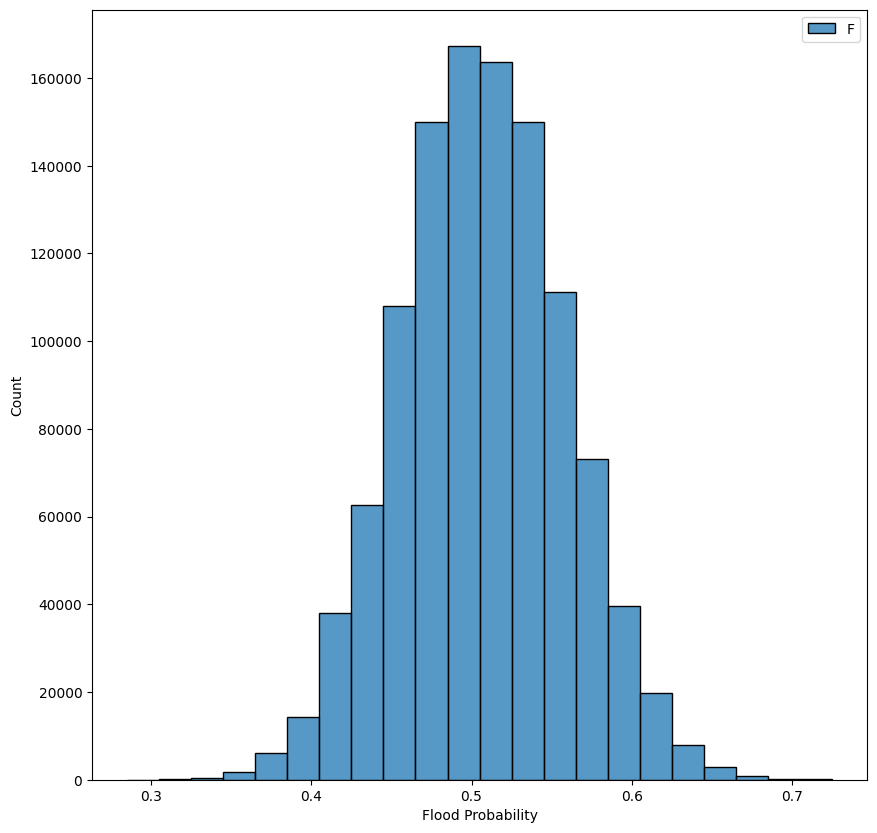

In [59]:
plt.figure(figsize=(10,10))
sns.histplot(data = train_df, x='FloodProbability',bins=22)
plt.legend('Flood probability')
plt.xlabel('Flood Probability')
plt.show()

In [20]:
y = train_df['FloodProbability']
features = train_df[['MonsoonIntensity','TopographyDrainage','RiverManagement','DamsQuality','Deforestation','ClimateChange']]
features_all = train_df.drop(columns=['id','FloodProbability'])

In [21]:
features = features.astype(float)

In [23]:
features_all = features_all.astype(float)

In [25]:
features = StandardScaler().fit_transform(features)
features_all = StandardScaler().fit_transform(features_all)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=7)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(features_all,y,test_size=0.2,random_state=7)

In [29]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_hat = lr.predict(x_test)

In [35]:
print('R2 score is: ', r2_score(y_test,y_hat))

R2 score is:  0.2170718001519656


In [39]:
paramsRidge = {'alpha':[0.01,0.1,1,0.5],
               'solver':['svd','cholesky','lsqr','auto','sag']}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge,paramsRidge,cv=10)
ridge_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 0.5],
                         'solver': ['svd', 'cholesky', 'lsqr', 'auto', 'sag']})

In [45]:
ridge_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 0.5],
                         'solver': ['svd', 'cholesky', 'lsqr', 'auto', 'sag']})

In [48]:
print('Best params are: ', ridge_cv.best_params_)
print('Best accuracy is: ', ridge_cv.best_score_)

Best params are:  {'alpha': 0.5, 'solver': 'sag'}
Best accuracy is:  0.8449380291449954


In [46]:
y_hat_ridge = ridge_cv.predict(X_test)

In [47]:
r2_score(Y_test,y_hat_ridge)

0.8449489286313852

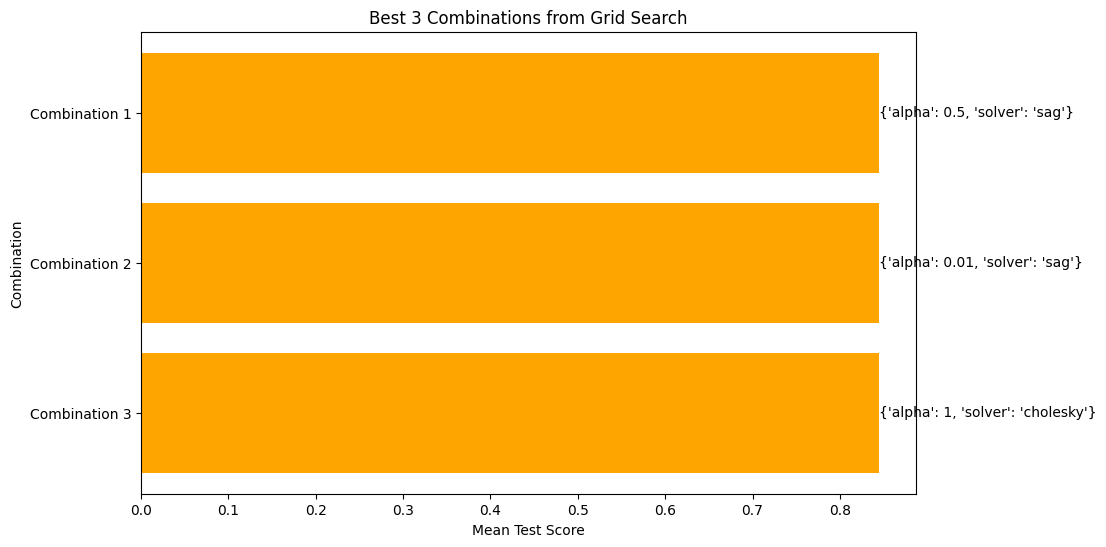

In [71]:
params = ridge_cv.cv_results_['params']
scores = ridge_cv.cv_results_['mean_test_score']

# Combine parameters and scores
results = list(zip(params, scores))

# Sort results by mean test score (descending order)
results.sort(key=lambda x: x[1], reverse=True)

# Extract the best 3 combinations
best_combinations = results[:3]

# Plot the best combinations
plt.figure(figsize=(10, 6))
for i, (param_set, score) in enumerate(best_combinations):
    plt.barh(f'Combination {i+1}', score, color='orange')
    plt.text(score, i, f'{param_set}', va='center', ha='left')
plt.xlabel('Mean Test Score')
plt.ylabel('Combination')
plt.title('Best 3 Combinations from Grid Search')
plt.gca().invert_yaxis()
plt.show()

In [73]:
x_submit = test_df.drop(['id'],axis=1)
x_submit = StandardScaler().fit_transform(x_submit)

In [74]:
predictions = ridge_cv.predict(x_submit)

In [76]:
ids = pd.DataFrame(test_df['id'])

In [78]:
flood_prob = pd.DataFrame(predictions)

In [79]:
ids['FloodProbability'] = predictions

In [81]:
ids.to_csv('submission.csv',index=False)